# 병원, 의원 Preprocessing

In [2]:
# 사용할 column: 상세영업상태명, 도로명전체주소, 의료기관종별명, 진료과목내용

# ['진료과목내용명'] == '소아청소년과'만 남기기
# 병원 - ['상세영업상태명'] == '영업중'만 남기기
# 의원 - ['상세영업상태명'] == '영업중'만 남기기

In [40]:
import pandas as pd

In [41]:
# 서울시 병원, 의원 data 가져오기
hospital = pd.read_csv('[필수활용01]서울시_병원정보.csv', encoding='cp949')
clinic = pd.read_csv('[필수활용02]서울시_의원정보.csv', encoding='cp949', low_memory=False)
print(hospital.columns, '\n')
print(clinic.columns) # '시도', '소재지시도' column 없음

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '의료기관종별명', '의료인수', '입원실수', '병상수', '총면적', '진료과목내용', '진료과목내용명', '지정취소일자',
       '완화의료지정형태', '완화의료담당부서명', '구급차특수', '구급차일반', '총인원', '구조사수', '허가병상수',
       '최초지정일자', '시도', '도로명시도', '소재지시도'],
      dtype='object') 

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '의료기관종별명', '의료인수', '입원실수', '병상수', '총면적', '진료과목내용', '진료과목내용명', '지정취소일자',
       '완화의료지정형태', '완화의료담당부서명', '구급차특수', '구급차일반', '총인원', '구조사수', '허가병상수',
       '

In [42]:
# 병원 종류 살펴보기
print("병원 종류")
print(hospital['의료기관종별명'].value_counts(), '\n')

# 진료과목 null값 확인
print("진료과목내용명 null 개수:", hospital['진료과목내용명'].isnull().sum(), '\n')

# 소아청소년과 병원 영업 상태 확인
pediatrics_hospital = hospital[(hospital['의료기관종별명'].isin(['병원', '한방병원', '종합병원'])) & (hospital['진료과목내용명'].str.contains('소아청소년과'))]
print("소아청소년과 병원 영업 상태")
print(pediatrics_hospital['상세영업상태명'].value_counts(), '\n')

# 영업중인 소아청소년과 병원 정보만 남기기
pediatrics_hospital = pediatrics_hospital[pediatrics_hospital['상세영업상태명'] == '영업중']

# 사용할 columns null값 확인
# columns = ['상세영업상태명', '도로명전체주소', '의료기관종별명']
# for column in columns:
#     print(column, "null 개수:", pediatrics_hospital[column].isnull().sum())

병원 종류
병원                 324
요양병원(일반요양병원)       172
한방병원               112
치과병원               105
종합병원                58
요양병원(노인병원)           4
요양병원(정신병원)           2
요양병원(장애인의료재활시설)      1
Name: 의료기관종별명, dtype: int64 

진료과목내용명 null 개수: 0 

소아청소년과 병원 영업 상태
영업중     123
폐업       29
휴업        1
직권폐업      1
Name: 상세영업상태명, dtype: int64 



In [43]:
# 의원 종류 살펴보기
print("의원 종류")
print(clinic['의료기관종별명'].value_counts(), '\n')

# 진료과목 null값 확인
print("진료과목내용명 null 개수:", clinic['진료과목내용명'].isnull().sum(), '\n')

# 진료과목 null값 실제로 보기
# print(clinic[clinic['진료과목내용명'].isna()][['상세영업상태명', '의료기관종별명']], '\n')

# 진료과목 null값 포함한 행 제거
clinic = clinic.drop(clinic[clinic['진료과목내용명'].isna()].index)
print("진료과목 null값 제거한 의원 종류")
print(clinic['의료기관종별명'].value_counts(), '\n') # 보건소 -1, 조산원 -4

# 소아청소년과 의원 영업 상태 확인
pediatrics_clinic = clinic[(clinic['의료기관종별명'].isin(['의원', '한의원'])) & (clinic['진료과목내용명'].str.contains('소아청소년과'))]
print(pediatrics_clinic['의료기관종별명'].value_counts())
print("소아청소년과 의원 영업 상태")
print(pediatrics_clinic['상세영업상태명'].value_counts(), '\n')

# 영업중인 소아청소년과 의원 정보만 남기기
pediatrics_clinic = pediatrics_clinic[pediatrics_clinic['상세영업상태명'] == '영업중']

# 사용할 columns(병원 columns와 동일) null값 확인
# for column in columns:
#     print(column, "null 개수:", pediatrics_hospital[column].isnull().sum())

의원 종류
의원      14338
치과의원     7019
한의원      6036
보건소        25
보건지소       12
조산원         9
Name: 의료기관종별명, dtype: int64 

진료과목내용명 null 개수: 5 

진료과목 null값 제거한 의원 종류
의원      14338
치과의원     7019
한의원      6036
보건소        24
보건지소       12
조산원         5
Name: 의료기관종별명, dtype: int64 

의원    4227
Name: 의료기관종별명, dtype: int64
소아청소년과 의원 영업 상태
영업중     3047
폐업      1174
직권폐업       3
휴업         3
Name: 상세영업상태명, dtype: int64 



# 병원, 의원, 미세먼지 EDA

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font="Malgun Gothic")

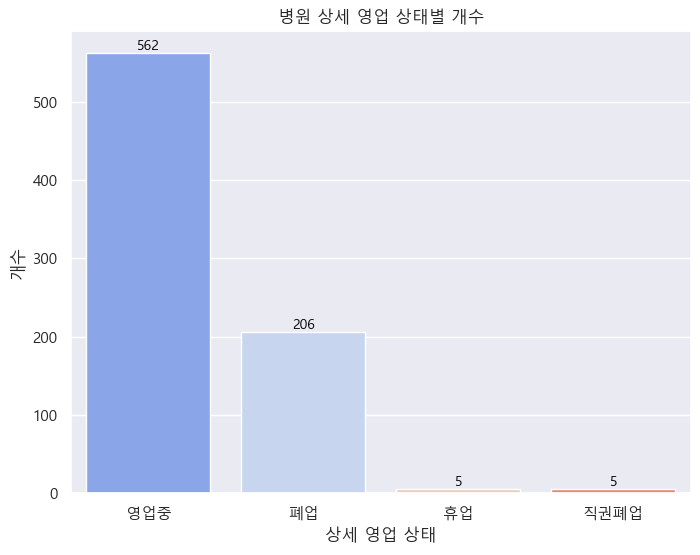

In [45]:
counts = hospital['상세영업상태명'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x=hospital['상세영업상태명'], order=counts.index, palette="coolwarm")

# 각 막대 위에 개수 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('병원 상세 영업 상태별 개수')
plt.xlabel('상세 영업 상태')
plt.ylabel('개수')
plt.show()

<Figure size 1000x600 with 0 Axes>

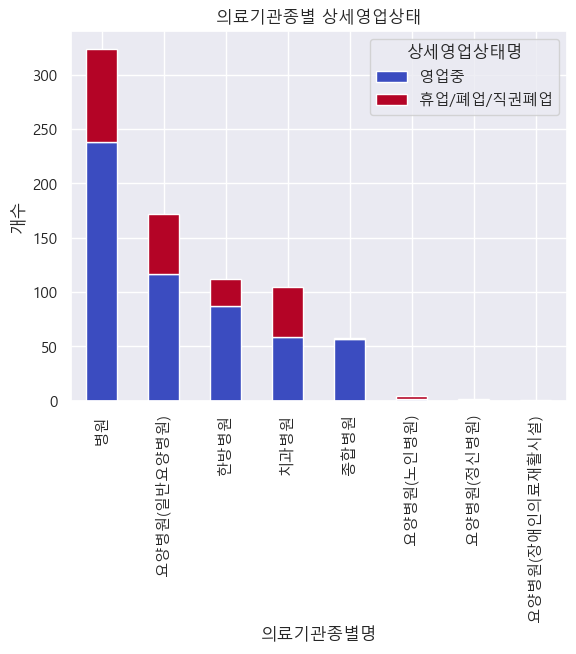

In [46]:
hospital['상세영업상태명'] = hospital['상세영업상태명'].replace({'휴업': '휴업/폐업/직권폐업', '폐업': '휴업/폐업/직권폐업', '직권폐업': '휴업/폐업/직권폐업'})

# 의료기관종별명과 상세영업상태명에 대한 Crosstab 생성
cross_table = pd.crosstab(hospital['의료기관종별명'], hospital['상세영업상태명'])

# 각 카테고리의 합계를 계산하고 크기 순으로 정렬
order = cross_table.sum(axis=1).sort_values(ascending=False).index

# 정렬된 순서로 데이터프레임 재배열
cross_table_sorted = cross_table.loc[order]

# stacked bar plot 그리기
plt.figure(figsize=(10, 6))
cross_table_sorted.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title('의료기관종별 상세영업상태')
plt.xlabel('의료기관종별명')
plt.ylabel('개수')

plt.show()


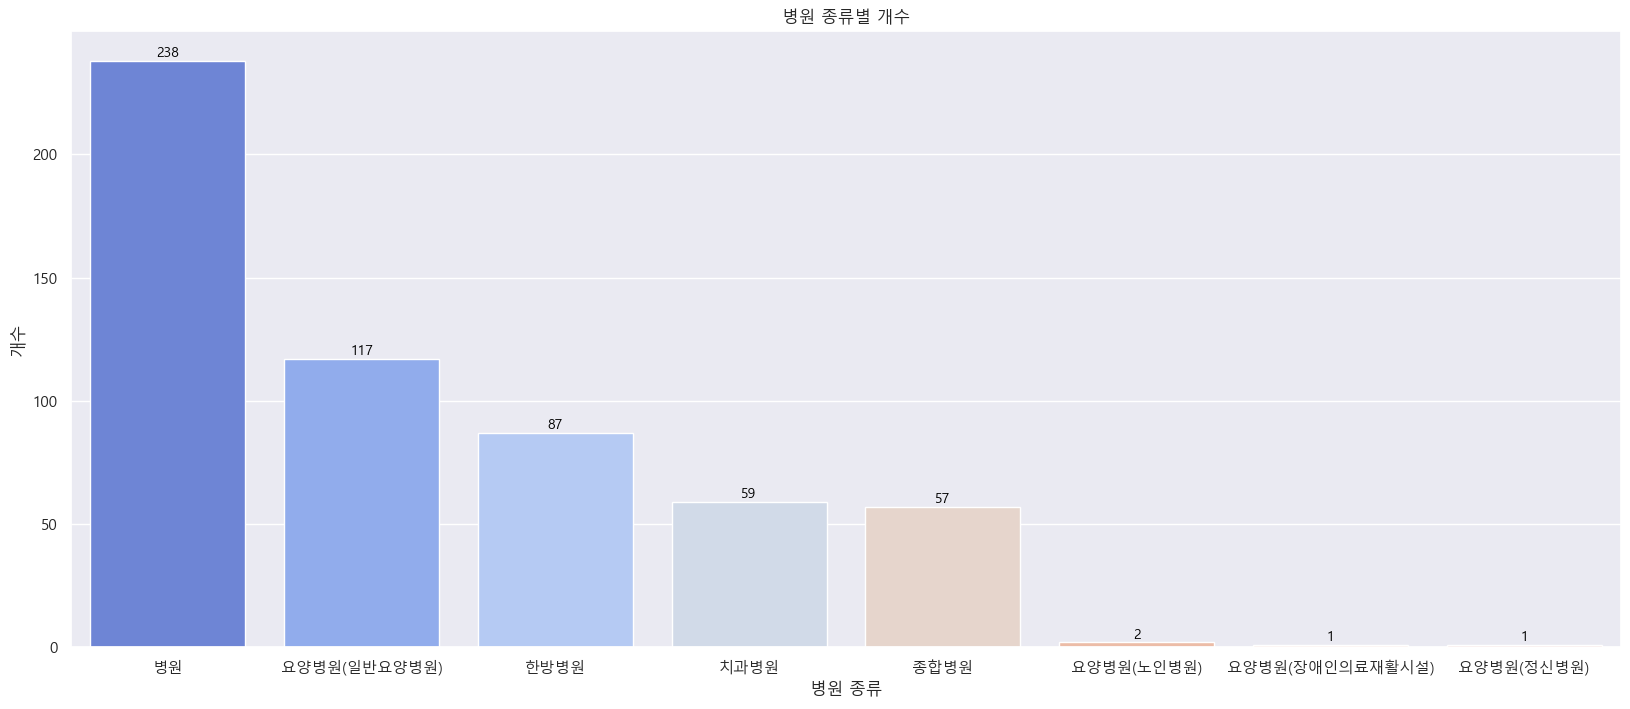

In [47]:
hospital = hospital[hospital['상세영업상태명'] == '영업중']
counts = hospital['의료기관종별명'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
ax = sns.countplot(x=hospital['의료기관종별명'], order=counts.index, palette="coolwarm")

# 각 막대 위에 개수 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('병원 종류별 개수')
plt.xlabel('병원 종류')
plt.ylabel('개수')
plt.show()

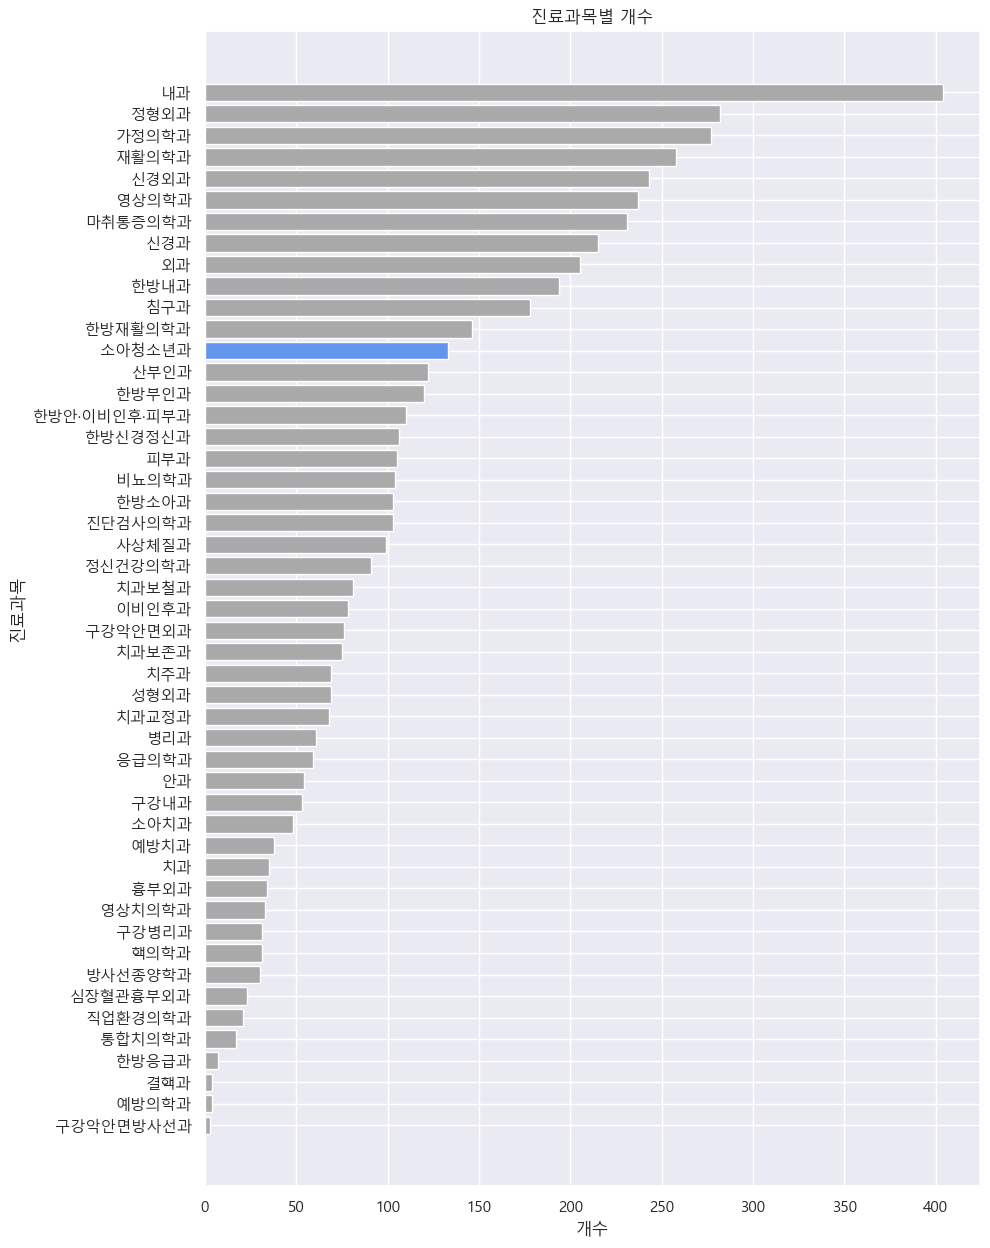

In [48]:
departments = hospital['진료과목내용명'].str.split(', ', expand=True).stack()
departments.reset_index(drop=True, inplace=True)

counts = departments.value_counts().sort_values(ascending=True)

colors = ['darkgray' if dep != '소아청소년과' else 'cornflowerblue' for dep in counts.index]

plt.figure(figsize=(10, 15))  # 세로 막대로 변경

plt.barh(counts.index, counts, color=colors)  # barh를 사용하여 세로 막대 그리기
plt.title('진료과목별 개수')
plt.xlabel('개수')
plt.ylabel('진료과목')
plt.show()

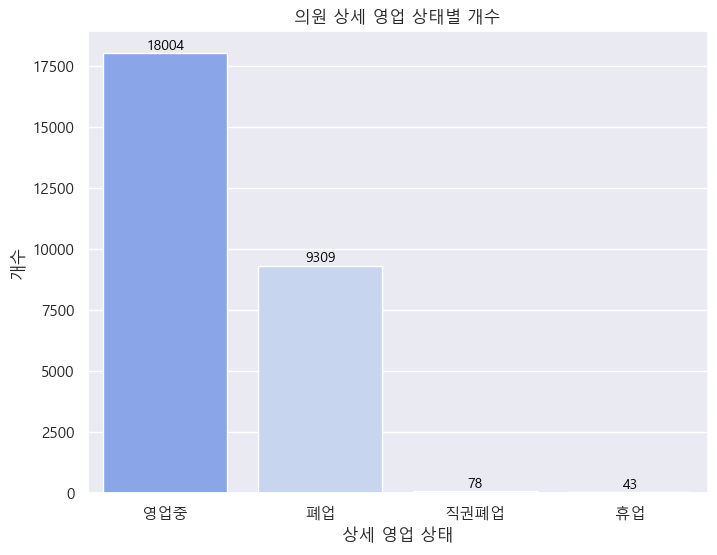

In [49]:
counts = clinic['상세영업상태명'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x=clinic['상세영업상태명'], order=counts.index, palette="coolwarm")

# 각 막대 위에 개수 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('의원 상세 영업 상태별 개수')
plt.xlabel('상세 영업 상태')
plt.ylabel('개수')
plt.show()

<Figure size 1000x600 with 0 Axes>

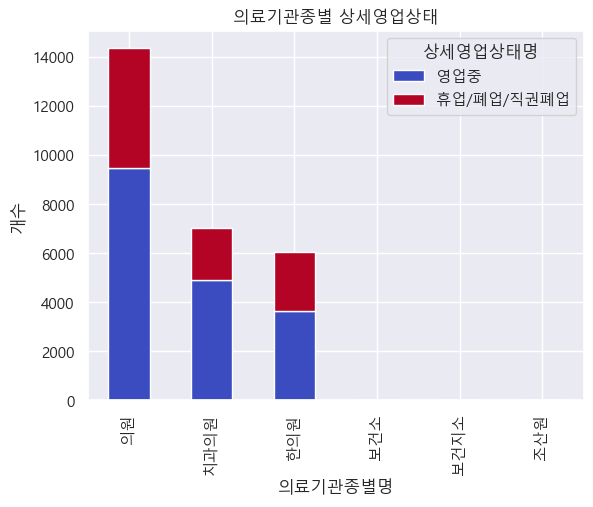

In [50]:
clinic['상세영업상태명'] = clinic['상세영업상태명'].replace({'휴업': '휴업/폐업/직권폐업', '폐업': '휴업/폐업/직권폐업', '직권폐업': '휴업/폐업/직권폐업'})

# 의료기관종별명과 상세영업상태명에 대한 Crosstab 생성
cross_table = pd.crosstab(clinic['의료기관종별명'], clinic['상세영업상태명'])

# 각 카테고리의 합계를 계산하고 크기 순으로 정렬
order = cross_table.sum(axis=1).sort_values(ascending=False).index

# 정렬된 순서로 데이터프레임 재배열
cross_table_sorted = cross_table.loc[order]

# stacked bar plot 그리기
plt.figure(figsize=(10, 6))
cross_table_sorted.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title('의료기관종별 상세영업상태')
plt.xlabel('의료기관종별명')
plt.ylabel('개수')

plt.show()


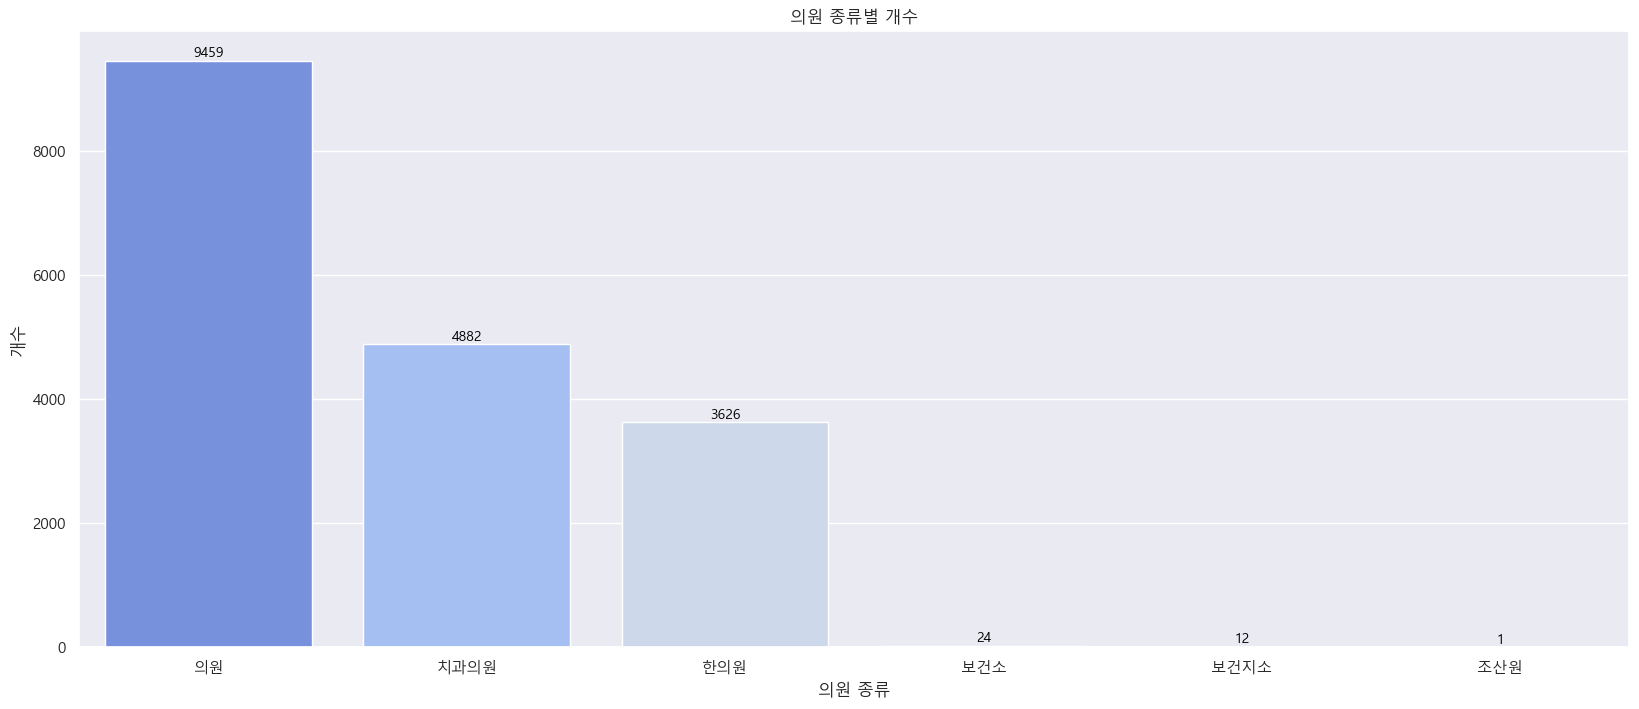

In [51]:
clinic = clinic[clinic['상세영업상태명'] == '영업중']
counts = clinic['의료기관종별명'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
ax = sns.countplot(x=clinic['의료기관종별명'], order=counts.index, palette="coolwarm")

# 각 막대 위에 개수 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('의원 종류별 개수')
plt.xlabel('의원 종류')
plt.ylabel('개수')
plt.show()

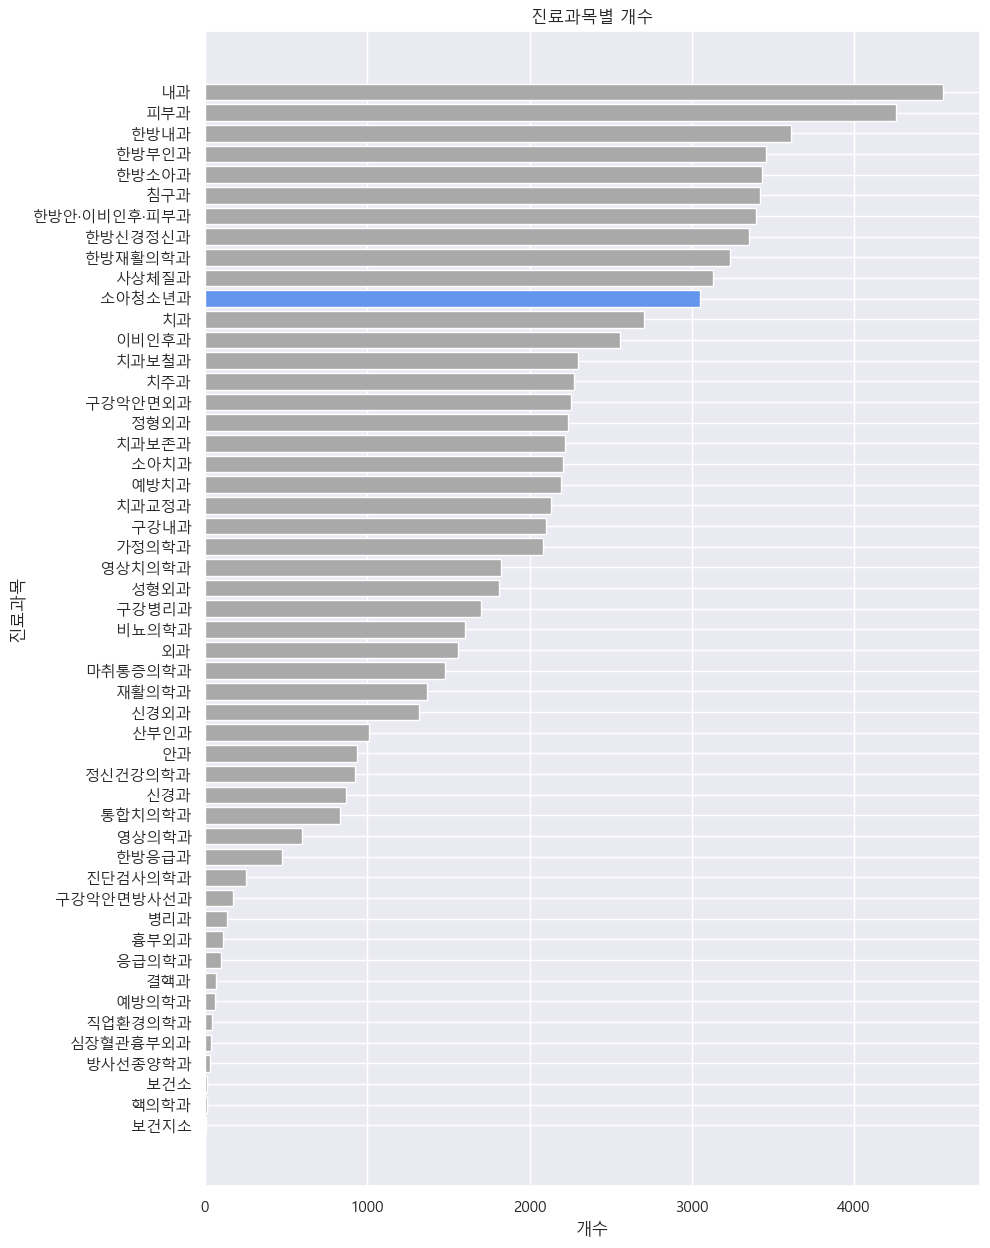

In [52]:
departments = clinic['진료과목내용명'].str.split(', ', expand=True).stack()
departments.reset_index(drop=True, inplace=True)

counts = departments.value_counts().sort_values(ascending=True)

colors = ['darkgray' if dep != '소아청소년과' else 'cornflowerblue' for dep in counts.index]

plt.figure(figsize=(10, 15))  # 세로 막대로 변경

plt.barh(counts.index, counts, color=colors)  # barh를 사용하여 세로 막대 그리기
plt.title('진료과목별 개수')
plt.xlabel('개수')
plt.ylabel('진료과목')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_287088\216856614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm10_2021_seoul.drop(['구분(1)', '구분(2)', '구분(3)'], axis=1, inplace=True)


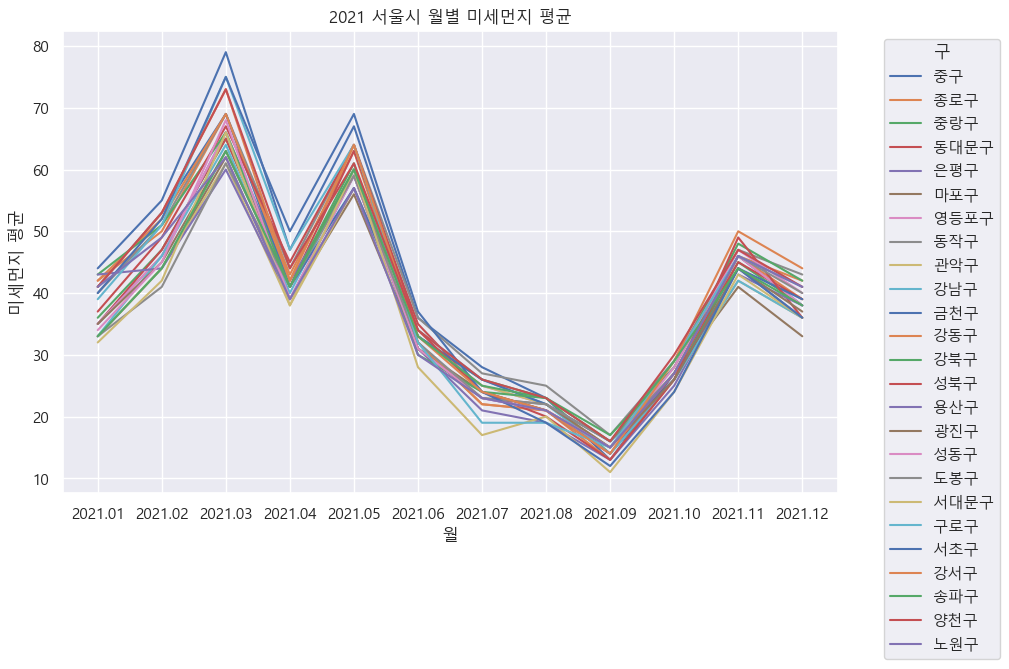

In [53]:
pm10_2021 = pd.read_csv('미세먼지_PM10__월별_대기오염도_2021.csv')
pm10_2021_seoul = pm10_2021[(pm10_2021['구분(1)'] == '도시대기') & (pm10_2021['구분(2)'] == '서울')]
pm10_2021_seoul.drop(['구분(1)', '구분(2)', '구분(3)'], axis=1, inplace=True)
pm10_2021_seoul.set_index('구분(4)', inplace=True)
pm10_2021_seoul = pm10_2021_seoul.apply(pd.to_numeric, errors='coerce')

# Line plot으로 시각화
ax = pm10_2021_seoul.T.plot(kind='line', figsize=(10, 6))
ax.set_xticks(range(len(pm10_2021_seoul.columns)))
ax.set_xticklabels(pm10_2021_seoul.columns)
plt.xlabel('월')
plt.ylabel('미세먼지 평균')
plt.title('2021 서울시 월별 미세먼지 평균')
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Hypothesis testing
## H0: 서울시 지역별 미세먼지와 소아청소년과 병원 수는 상관관계가 없다
## H1: 서울시 지역별 미세먼지와 소아청소년과 병원 수는 상관관계가 있다

In [54]:
from scipy import stats

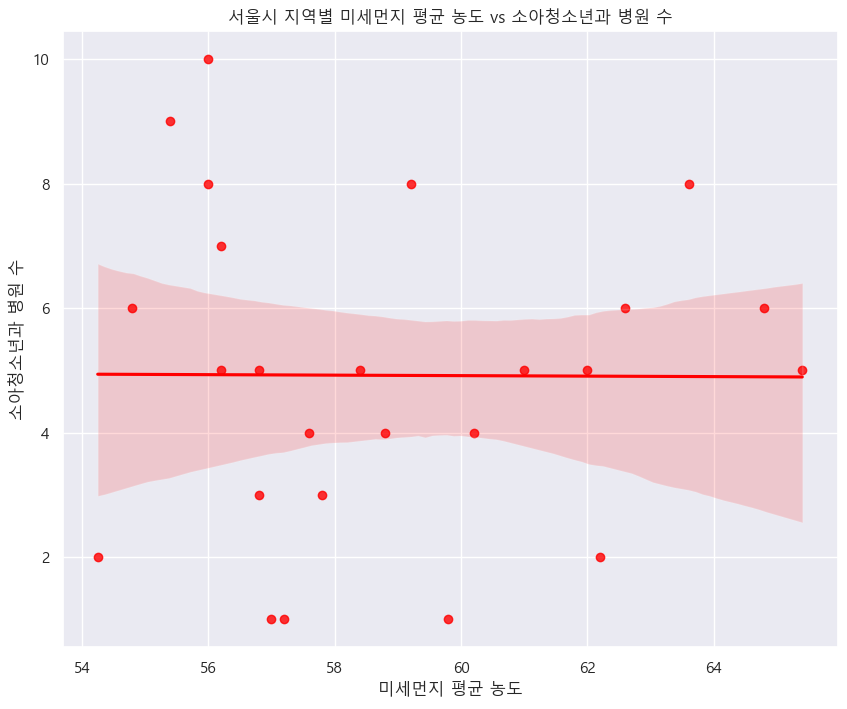

In [55]:
df = pd.read_csv('medical-facility-location.csv')
plt.figure(figsize=(10, 8))
sns.regplot(data=df, x='평균 미세먼지 농도', y='소아청소년과 병원 수', color='red')
plt.title('서울시 지역별 미세먼지 평균 농도 vs 소아청소년과 병원 수')
plt.xlabel('미세먼지 평균 농도')
plt.ylabel('소아청소년과 병원 수')
plt.show()

<Axes: >

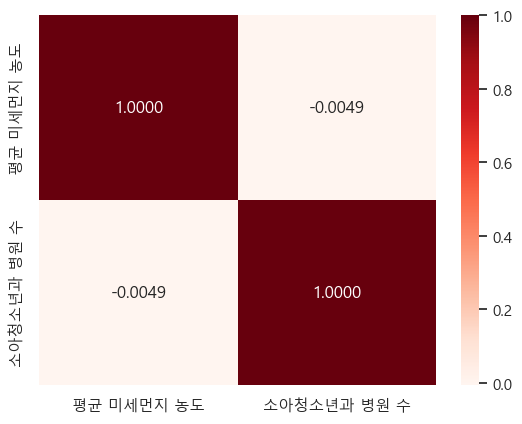

In [56]:
sns.heatmap(df[['평균 미세먼지 농도', '소아청소년과 병원 수']].corr(), annot=True, cmap='Reds', fmt='.4f')

In [57]:
print(stats.pearsonr(df['평균 미세먼지 농도'], df['소아청소년과 병원 수']))
print(stats.spearmanr(df['평균 미세먼지 농도'], df['소아청소년과 병원 수']))

PearsonRResult(statistic=-0.004948731795635954, pvalue=0.9812698366954934)
SignificanceResult(statistic=-0.08884556573106817, pvalue=0.6727900688799668)


# Hypothesis testing
## H0: 서울시 지역별 미세먼지와 소아청소년과 의원 수는 상관관계가 없다
## H1: 서울시 지역별 미세먼지와 소아청소년과 의원 수는 상관관계가 있다

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


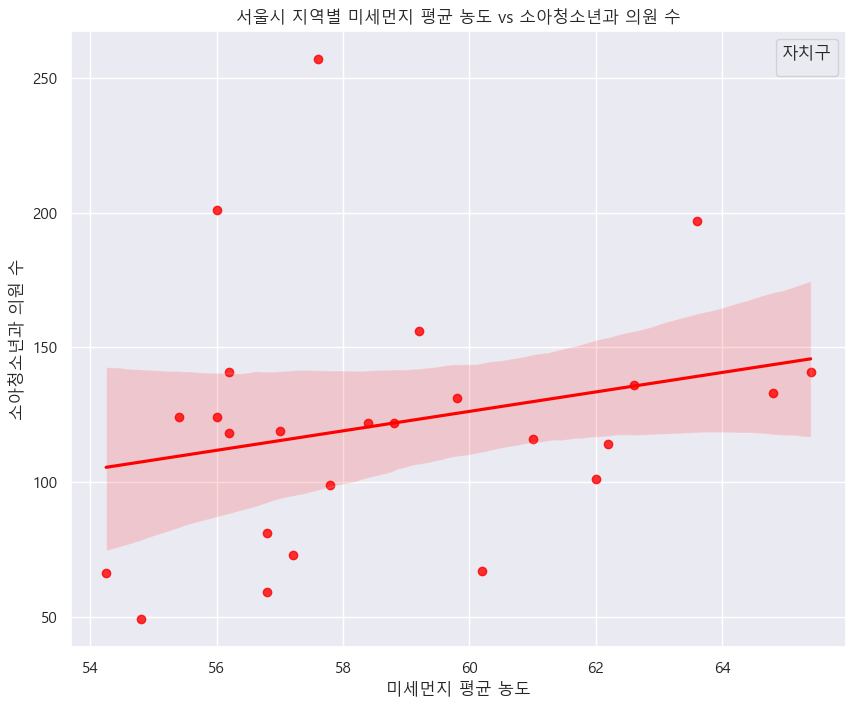

In [58]:
plt.figure(figsize=(10, 8))
sns.regplot(data=df, x='평균 미세먼지 농도', y='소아청소년과 의원 수', color='red')
plt.title('서울시 지역별 미세먼지 평균 농도 vs 소아청소년과 의원 수')
plt.xlabel('미세먼지 평균 농도')
plt.ylabel('소아청소년과 의원 수')
plt.show()

<Axes: >

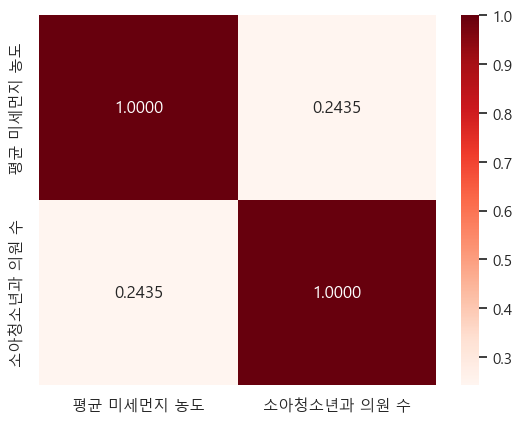

In [59]:
sns.heatmap(df[['평균 미세먼지 농도', '소아청소년과 의원 수']].corr(), annot=True, cmap='Reds', fmt='.4f')

In [60]:
print(stats.pearsonr(df['평균 미세먼지 농도'], df['소아청소년과 의원 수']))
print(stats.spearmanr(df['평균 미세먼지 농도'], df['소아청소년과 의원 수']))

PearsonRResult(statistic=0.24346519359005286, pvalue=0.2408945896968059)
SignificanceResult(statistic=0.29110512129380056, pvalue=0.15800863515745628)


# Regression

In [106]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

C:\Users\user\AppData\Local\Temp\ipykernel_7000\631030411.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Blues')


<Axes: >

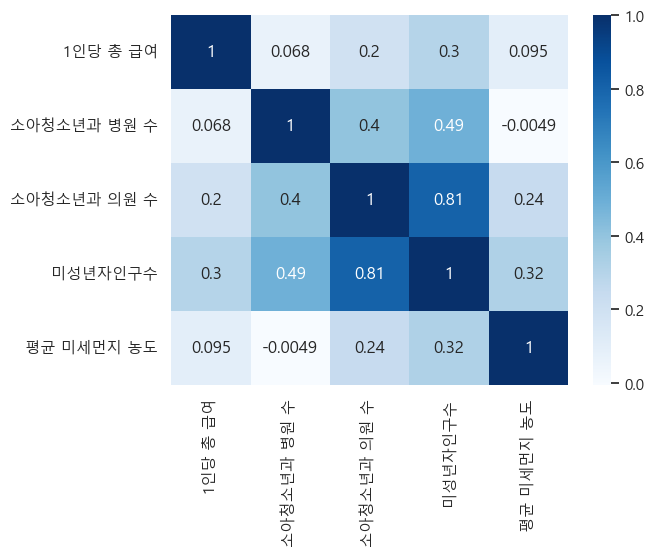

In [91]:
df = pd.read_csv('medical-facility-location.csv')
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Blues')

Mean Squared Error: 6.0582971757710995
회귀 계수: [3.09045805e-05]
절편: 3.1733430815985826


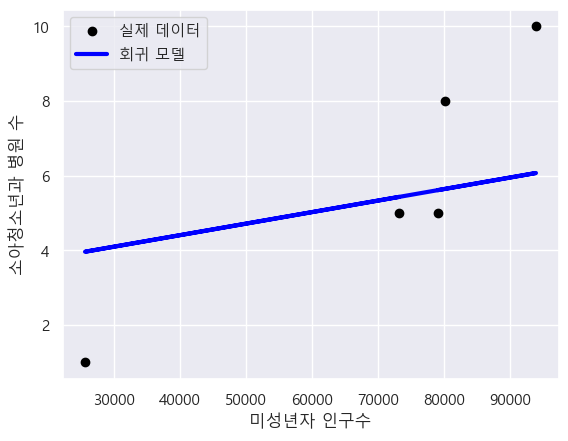

In [118]:
X = df[['미성년자인구수']]
y = df['소아청소년과 병원 수']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 학습된 모델의 회귀 계수와 절편 확인
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

# 시각화
plt.scatter(X_test, y_test, color='black', label='실제 데이터')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='회귀 모델')
plt.xlabel('미성년자 인구수')
plt.ylabel('소아청소년과 병원 수')
plt.legend()
plt.show()

Mean Squared Error: 1436.614392693839
회귀 계수: [0.00171956]
절편: 33.005489586830464


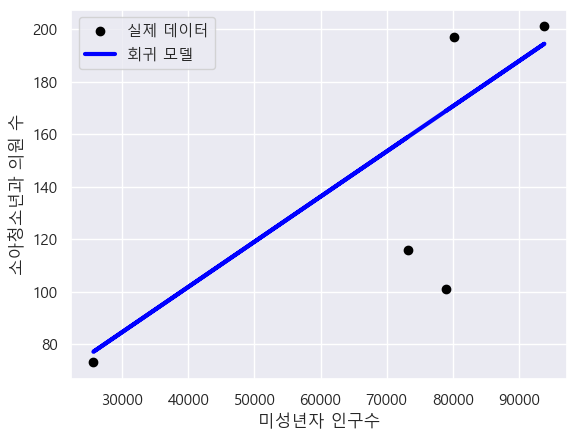

In [122]:
X = df[['미성년자인구수']]
y = df['소아청소년과 의원 수']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 학습된 모델의 회귀 계수와 절편 확인
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

# 시각화
plt.scatter(X_test, y_test, color='black', label='실제 데이터')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='회귀 모델')
plt.xlabel('미성년자 인구수')
plt.ylabel('소아청소년과 의원 수')
plt.legend()
plt.show()